SCT211-0848/2018  
Jany Muong  

ICS 2207: Scientific Computing

# Scientific Simulation  

## Background Info:
For context, this is a **Simulation** involving **partial differential equations** (PDEs), specifically the **Heat Equation** - for modeling complex physical phenomena. PDEs extend ordinary differential equations to handle **multivariate derivatives**, making them essential for various scientific and engineering applications. Two common numerical methods for solving PDEs are: ***finite-difference methods (FDMs)*** and ***finite-element methods (FEMs)***.  
**FDMs** approximate derivatives with *finite differences* on a *discretized grid*, converting PDEs into algebraic equations. **FEMs** express the unknown *function as a linear combination of basis functions*, providing flexibility for complex geometries and boundary conditions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la

# import dolfin
# import mshr


## Finite-Difference Method (FDM):
FDM approximates derivatives using finite differences on a discrete grid. Here's an example of solving a second-order ODE using FDM in Python:

In [2]:
# define variables - init
N = 5
u0, u1 = 1, 2
dx = 1.0 / (N + 1)

In [3]:
# construct matrix A
A = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2
A

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

In [4]:
# matrix b
b = -5 * np.ones(N)
b[0] -= u0 / dx**2
b[N-1] -= u1 / dx**2

In [5]:
# solution to the ODE pset
u = la.solve(A, b)

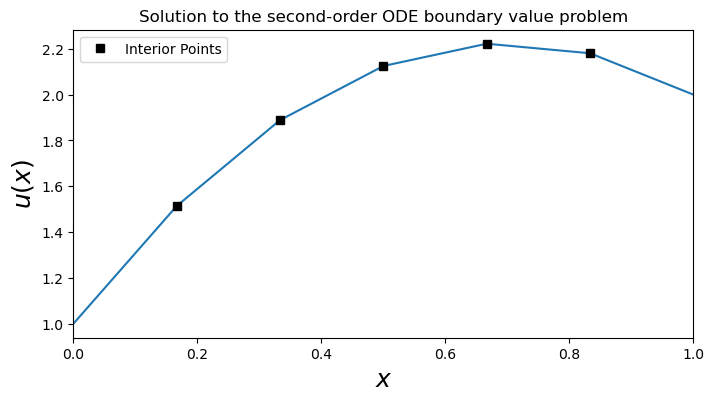

In [6]:
'''visualizations
create an array x that contains the discrete coordinate points for which we have 
solved the problem, including the boundary points, and we also create an array U that 
combines the boundary values and the interior points in one array
'''
x = np.linspace(0, 1, N+2)
U = np.hstack([[u0], u, [u1]])

# plt.figure(figsize=(8, 4))
# plt.plot(x, U, label='Solution')
# plt.plot(x[1:-1], u, 'ks', label='Interior Points')
# plt.xlim(0, 1)
# plt.xlabel('$x$')
# plt.ylabel('$u(x)$')
# plt.legend()
# plt.title('Solution using Finite-Difference Method')
# plt.grid(True)
# plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks', label='Interior Points')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
plt.legend()
plt.title('Solution to the second-order ODE boundary value problem')
plt.show()

### More Of FDM  

For more context, to solve PDEs problem with Python and the FDM method, we start 
by defining variables for the number of interior points and the values along the four 
boundaries of the unit square:

  (0, 0)	-40804.0
  (0, 1)	10201.0
  (0, 100)	10201.0
  (1, 0)	10201.0
  (1, 1)	-40804.0
  (1, 2)	10201.0
  (1, 101)	10201.0
  (2, 1)	10201.0
  (2, 2)	-40804.0
  (2, 3)	10201.0
  (2, 102)	10201.0
  (3, 2)	10201.0
  (3, 3)	-40804.0
  (3, 4)	10201.0
  (3, 103)	10201.0
  (4, 3)	10201.0
  (4, 4)	-40804.0
  (4, 5)	10201.0
  (4, 104)	10201.0
  (5, 4)	10201.0
  (5, 5)	-40804.0
  (5, 6)	10201.0
  (5, 105)	10201.0
  (6, 5)	10201.0
  (6, 6)	-40804.0
  :	:
  (9993, 9993)	-40804.0
  (9993, 9994)	10201.0
  (9994, 9894)	10201.0
  (9994, 9993)	10201.0
  (9994, 9994)	-40804.0
  (9994, 9995)	10201.0
  (9995, 9895)	10201.0
  (9995, 9994)	10201.0
  (9995, 9995)	-40804.0
  (9995, 9996)	10201.0
  (9996, 9896)	10201.0
  (9996, 9995)	10201.0
  (9996, 9996)	-40804.0
  (9996, 9997)	10201.0
  (9997, 9897)	10201.0
  (9997, 9996)	10201.0
  (9997, 9997)	-40804.0
  (9997, 9998)	10201.0
  (9998, 9898)	10201.0
  (9998, 9997)	10201.0
  (9998, 9998)	-40804.0
  (9998, 9999)	10201.0
  (9999, 9899)	10201.0
  (9999, 9998)	

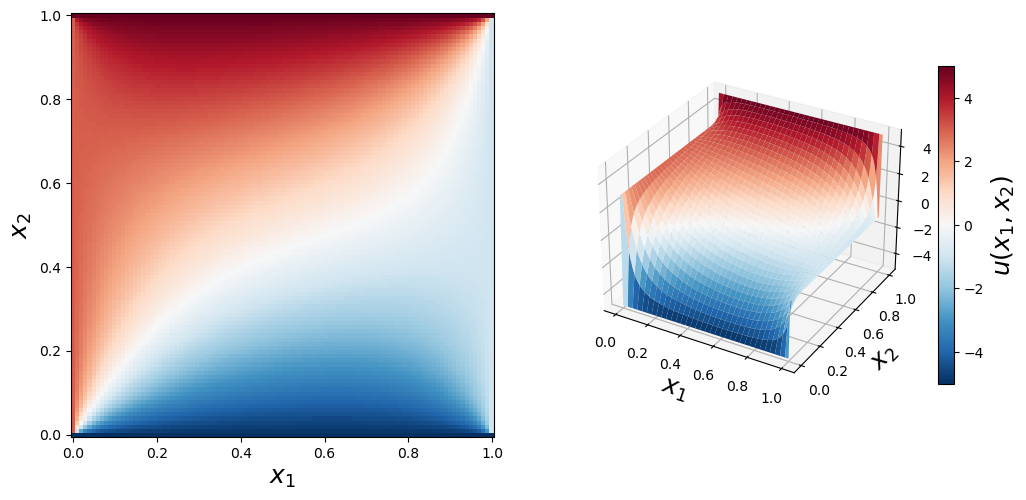

In [7]:
# define variables
N = 100  # size of the grid
u0_t, u0_b = 5, -5  # boundary conditions at top and bottom
u0_l, u0_r = 3, -1  # boundary conditions at left and right
dx = 1.0 / (N + 1)  # grid spacing

# construct matrix A using sparse matrices
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N)) / dx**2
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N)) / dx**2

# print information about the sparse matrix A
print(A)

# create boundary condition vector b
b = np.zeros((N, N))
b[0, :] += u0_b   # Bottom boundary
b[-1, :] += u0_t  # Top boundary
b[:, 0] += u0_l   # Left boundary
b[:, -1] += u0_r  # Right boundary
b = -b.reshape(N**2) / dx**2

# solve the equation system using sparse matrices
v = sp.linalg.spsolve(A, b)
u = v.reshape(N, N)

# create matrix U for plotting
U = np.vstack([np.ones((1, N+2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
               np.ones((1, N+2)) * u0_t])

# create coordinate matrices X and Y for plotting
x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)

# plot the solution
fig = plt.figure(figsize=(12, 5.5))
cmap = plt.get_cmap('RdBu_r')

ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3, linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

plt.show()

## Finite-Element Method (FEM):
FEM represents the unknown function as a linear combination of basis functions and solves PDEs on complex domains.  
Solving a PDE using FEM typically involves the following steps:
 1. Generate a mesh for the problem domain.
 2. Write the PDE on weak form.
 3. Program the problem in the FEM framework.
 4. Solve the resulting algebraic equations.
 5. Post-process and/or visualize the sol
ution
Here's an example of solving a two-dimensional PDE using FEM in Python:

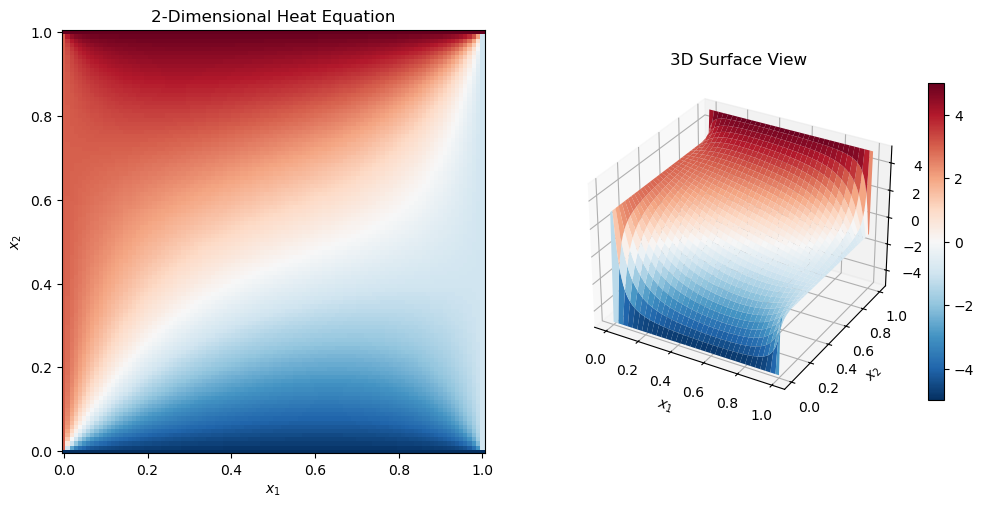

In [8]:
# define variables - init
N = 100
u0_t, u0_b = 5, -5
u0_l, u0_r = 3, -1
dx = 1.0 / (N + 1)

# construct matrix A
A_1d = (np.eye(N, k=-1) + np.eye(N, k=1) - 4 * np.eye(N)) / dx**2
A = np.kron(np.eye(N), A_1d) + (np.eye(N**2, k=-N) + np.eye(N**2, k=N)) / dx**2

# define vector b
b = np.zeros((N, N))
b[0, :] += u0_b
b[-1, :] += u0_t
b[:, 0] += u0_l
b[:, -1] += u0_r
b = -b.reshape(N**2) / dx**2

# solve the linear system Av = b
v = np.linalg.solve(A, b)
u = v.reshape(N, N)

# create coordinate matrices for plotting
x = np.linspace(0, 1, N + 2)
X, Y = np.meshgrid(x, x)
U = np.vstack([np.ones((1, N + 2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
               np.ones((1, N + 2)) * u0_t])

# plot the solution
fig = plt.figure(figsize=(12, 5.5))
ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap='RdBu_r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('2-Dimensional Heat Equation')

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3, cmap='RdBu_r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('3D Surface View')

fig.colorbar(p, ax=ax, shrink=0.75)
plt.show()

### `From the Book` - Solving PDEs Using FEniCS
The specific example from the book involves solving the two-dimensional **heat equation** with **Dirichlet boundary conditions** using FEniCS.  
**FEniCS** is a technique of **FEM methods** The steps are listed out below:

1. **Import Libraries**: Import necessary libraries including `dolfin` for FEniCS computations.

2. **Define Mesh**: Create a mesh representing the problem domain, such as a square or rectangle, using `**dolfin**`.

3. **Define Function Space**: Define the function space for the finite element method using `FunctionSpace`. This specifies the type of functions that will be used to approximate the solution.

4. **Define Boundary Conditions**: Specify the Dirichlet boundary conditions by creating instances of `DirichletBC`. These conditions prescribe the values of the solution at the boundaries of the domain.

5. **Define Variational Problem**: Formulate the variational problem using the weak form of the heat equation. This involves defining the trial and test functions, as well as the bilinear and linear forms.

6. **Solve the Problem**: Use the `solve` function to solve the variational problem. Provide the variational problem, boundary conditions, and appropriate solver parameters as arguments to `solve`.

7. **Visualize the Solution**: Plot the solution using plotting functions available in FEniCS. This can include creating contour plots or 3D surface plots of the temperature distribution.

This demonstrates the workflow of solving PDEs using FEniCS, from defining the problem and setting up the finite element method to solving the variational problem and visualizing the results. FEniCS abstracts away many of the low-level details of finite element computations, allowing users to focus on the mathematical formulation and analysis of PDE problems.  

**NB**: FEniCS haas dependency issues on colab and local machines especially using the Python interface **dolfin** (module). So I am going to just show the code - in **LaTeX** only - that is used to achieve the same effect as done earlier in the above segments prior to this FEniCS segment:  
Here is patch work/modified brief code snippet(not as exactly from the book) using **FEniCS** to solve the two-dimensional heat equation with Dirichlet boundary conditions:

```python
from fenics import *

# define mesh
mesh = RectangleMesh(Point(0, 0), Point(1, 1), 50, 50)

# define function space
V = FunctionSpace(mesh, 'P', 1)

# define boundary conditions
u0_b = Constant(0.0)
u0_t = Constant(1.0)
u0_l = Constant(0.0)
u0_r = Constant(0.0)

bc_bottom = DirichletBC(V, u0_b, 'on_boundary && near(x[1], 0)')
bc_top = DirichletBC(V, u0_t, 'on_boundary && near(x[1], 1)')
bc_left = DirichletBC(V, u0_l, 'on_boundary && near(x[0], 0)')
bc_right = DirichletBC(V, u0_r, 'on_boundary && near(x[0], 1)')
bcs = [bc_bottom, bc_top, bc_left, bc_right]

# define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
a = inner(grad(u), grad(v)) * dx
L = f * v * dx

# solve the problem
u = Function(V)
solve(a == L, u, bcs)

# plot the solution
plot(u)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()
plt.show()
```

This code sets up and solves the **heat equation on a 2D rectangular domain using FEniCS**. It defines the mesh, function space, boundary conditions, variational problem, and then solves the problem using the `solve` function. Also, it plots the solution using matplotlib's `plot` function.